# Import Library

In [61]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors



pd.set_option('display.max_columns', None)

# Import Data

In [62]:
status = pd.read_csv('pokemon.csv')

status = status.drop(columns=['Unnamed: 0'])


status.head()

national_id      main_name  hp  attack  defense  spatk  spdef  speed  \
0            0      Bulbasaur  45      49       49     65     65     45   
1            1        Ivysaur  60      62       63     80     80     60   
2            2       Venusaur  80      82       83    100    100     80   
3            3  Mega Venusaur  80     100      123    122    120     80   
4            4     Charmander  39      52       43     60     50     65   

   count_form  
0           1  
1           1  
2           2  
3           2  
4           1

# Data Understanding

In [63]:
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   national_id  1194 non-null   int64 
 1   main_name    1194 non-null   object
 2   hp           1194 non-null   int64 
 3   attack       1194 non-null   int64 
 4   defense      1194 non-null   int64 
 5   spatk        1194 non-null   int64 
 6   spdef        1194 non-null   int64 
 7   speed        1194 non-null   int64 
 8   count_form   1194 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 84.1+ KB


In [64]:
status.national_id.count()

1194

In [65]:
status.count_form.value_counts()

1    860
2    256
3     36
4     36
6      6
Name: count_form, dtype: int64

In [66]:
status[['hp','attack','defense','spatk','spdef']].mean()

hp         70.887772
attack     80.948911
defense    74.587102
spatk      72.876884
spdef      72.128141
dtype: float64

# Data Preparation

In [67]:
count_form = status.count_form.values
main_name = status.main_name.values
national_id = status.national_id.values

In [68]:
status = status.drop(columns=['national_id','count_form','main_name'])

In [69]:
df = status.copy()

df.head()

hp  attack  defense  spatk  spdef  speed
0  45      49       49     65     65     45
1  60      62       63     80     80     60
2  80      82       83    100    100     80
3  80     100      123    122    120     80
4  39      52       43     60     50     65

# Data Preprocessing

### Missing Value

In [70]:
df.isna().sum()

hp         0
attack     0
defense    0
spatk      0
spdef      0
speed      0
dtype: int64

### Handling Outlier 

In [71]:
df.skew()

hp         1.642437
attack     0.428640
defense    1.135750
spatk      0.706834
spdef      0.899306
speed      0.378526
dtype: float64

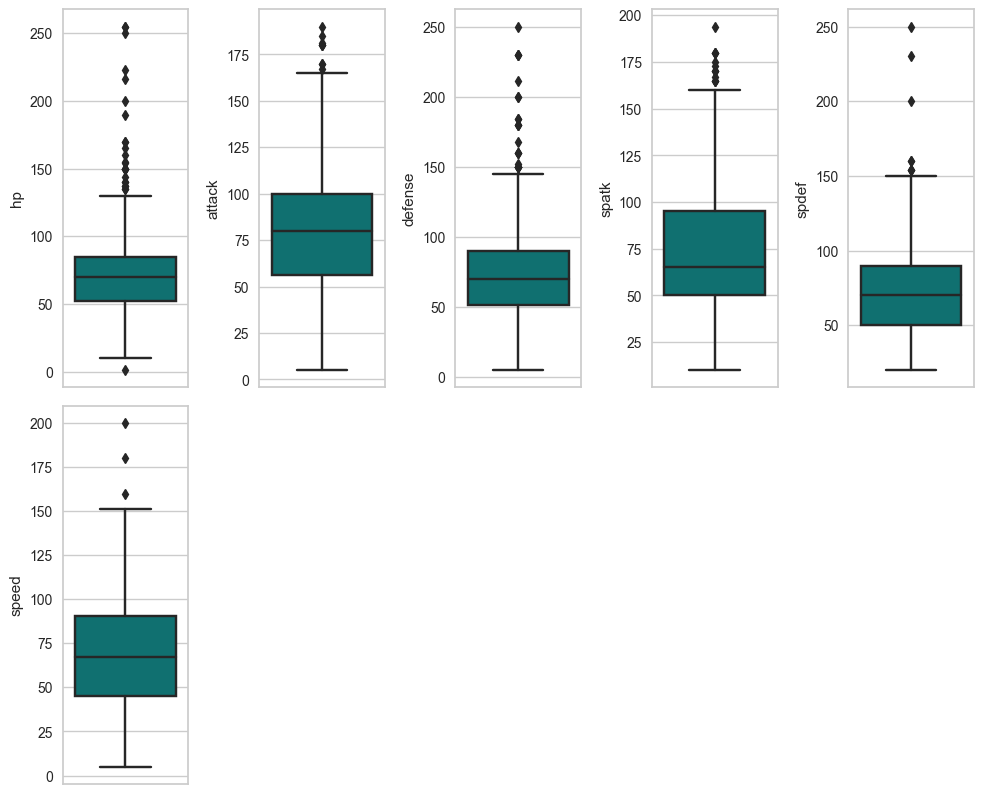

In [72]:
plt.figure(figsize=(10,20))

feat_num = df.select_dtypes(include=[np.number]).columns.tolist()

# plotting
for i in range(0, len(feat_num)):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=df[feat_num[i]],color='teal', orient='v')
    plt.tight_layout()

### Transformasi Log

In [73]:
for i in range(0, len(feat_num)):
    df[feat_num[i]] = np.log10(df[feat_num[i]]+1)

In [74]:
# def remove_outliers(df):
#     float_cols = df.select_dtypes(include=['float64']).columns.tolist()
#     int_cols = df.select_dtypes(include=['int64']).columns.tolist()
    
#     # Menghapus nilai outlier pada setiap atribut
#     for col in float_cols + int_cols:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5*IQR
#         upper_bound = Q3 + 1.5*IQR
        
#         if col in float_cols:
#             df = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]
#         elif col in int_cols:
#             df = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]
    
#     return df
# df = remove_outliers(df)

def impute_outliers(df):
    float_cols = df.select_dtypes(include=['float64']).columns.tolist()
    int_cols = df.select_dtypes(include=['int64']).columns.tolist()
    
    # Menghapus nilai outlier pada setiap atribut
    for col in float_cols + int_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        
        if col in float_cols:
            df.loc[df[col] < lower_bound, col] = df[col].mean()
            df.loc[df[col] > upper_bound, col] = df[col].mean()
        elif col in int_cols:
            df.loc[df[col] < lower_bound, col] = df[col].mean()
            df.loc[df[col] > upper_bound, col] = df[col].mean()
    
    return df

df = impute_outliers(df)

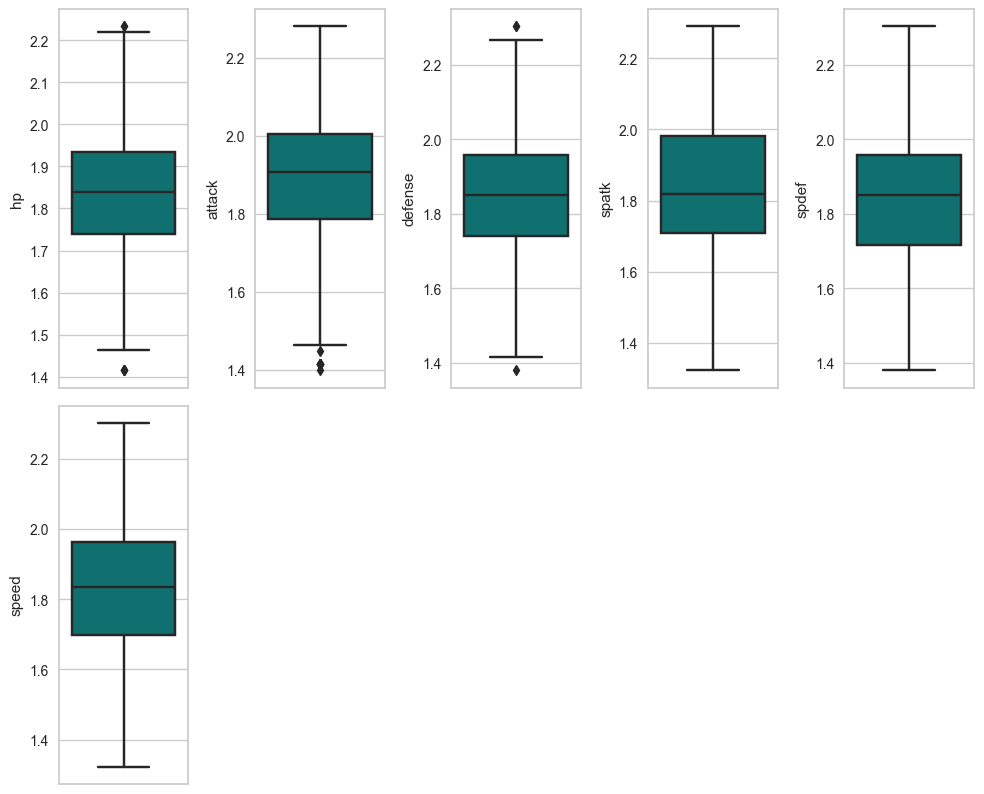

In [75]:
plt.figure(figsize=(10,20))

# plotting
for i in range(0, len(feat_num)):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=df[feat_num[i]],color='teal', orient='v')
    plt.tight_layout()

# Normalisasi Data

In [76]:
scaler = MinMaxScaler()
num_df_transform = pd.DataFrame(scaler.fit_transform(df[feat_num]), columns=feat_num)

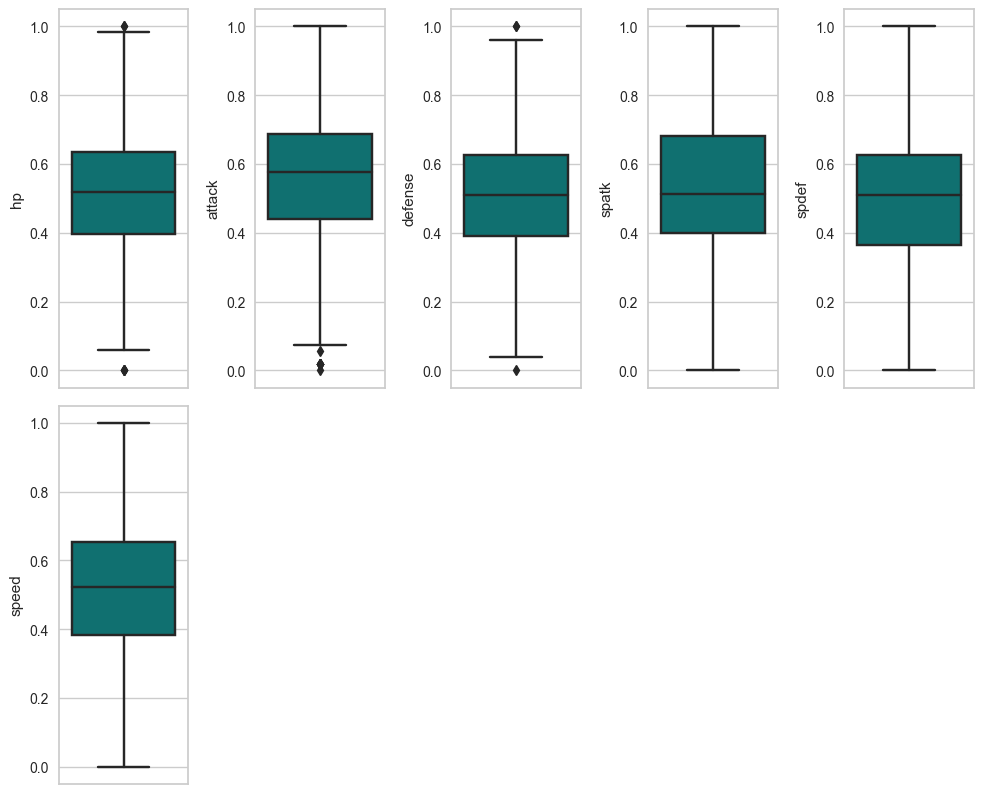

In [77]:
plt.figure(figsize=(10,20))
num_df_column = num_df_transform.columns
# plotting
for i in range(0, len(num_df_column)):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=num_df_transform[num_df_column[i]],color='teal', orient='v')
    plt.tight_layout()

# Exploratory Data Analysis

In [78]:
import pandas_profiling # library for automatic EDA

report = pandas_profiling.ProfileReport(df)

display(report)

# report.to_file(output_file='EDA_Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Modelling KMeans

### Elbow Method

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

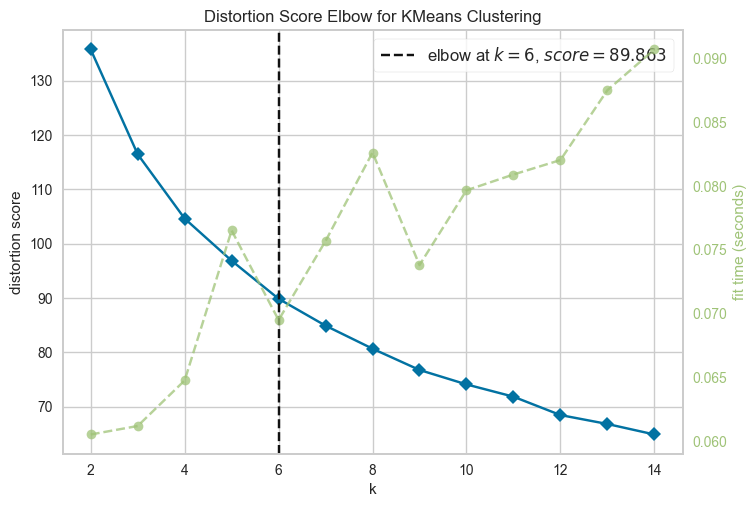

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [79]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,15))
elbow.fit(df.values)
elbow.show()

### Model

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   hp       1194 non-null   float64
 1   attack   1194 non-null   float64
 2   defense  1194 non-null   float64
 3   spatk    1194 non-null   float64
 4   spdef    1194 non-null   float64
 5   speed    1194 non-null   float64
dtypes: float64(6)
memory usage: 56.1 KB


In [81]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

n_init: 2, Inertia: 116.48736907538809
n_init: 5, Inertia: 116.46904432875282
n_init: 10, Inertia: 116.46711559592674
n_init: 20, Inertia: 116.46659545367048
n_init: 50, Inertia: 116.46659545367048
n_init: 100, Inertia: 116.46659545367051


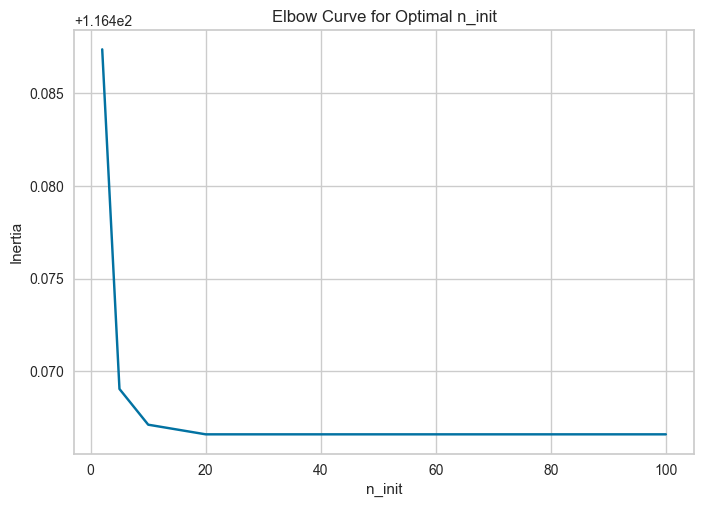

In [82]:
n_init_values = [2, 5, 10, 20, 50, 100]
inertias = []

for n_init in n_init_values:
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=n_init)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)
    print(f"n_init: {n_init}, Inertia: {kmeans.inertia_}")
    
# plot elbow curve
plt.plot(n_init_values, inertias)
plt.xlabel("n_init")
plt.ylabel("Inertia")
plt.title("Elbow Curve for Optimal n_init")
plt.show()


In [83]:
kmeans = KMeans(n_clusters=6, random_state=12, n_init = 10,init='k-means++').fit(df.values)


In [84]:
kmeans_prediction = kmeans.predict(df.values)

df['label'] = kmeans.labels_


# Evaluasi Model

In [85]:
print('Silhouette score: {}'.format(round(silhouette_score(df,kmeans_prediction),3)))

Silhouette score: 0.68


# Visualisasi Model

In [86]:
# hitung mean, median, dan modus
result = df.groupby('label').agg(['mean', 'median', lambda x: x.mode()[0]])

result = result.rename(columns={'<lambda_0>': 'mode'})

result

hp                        attack                       defense  \
           mean    median      mode      mean    median      mode      mean   
label                                                                         
0      1.670553  1.662758  1.612784  1.713763  1.720140  1.662758  1.625759   
1      1.869428  1.851258  1.819544  1.993596  1.982271  2.004321  1.861841   
2      1.946366  1.959041  2.004321  2.040928  2.029365  2.004321  1.947678   
3      1.708932  1.707570  1.707570  1.735394  1.748188  1.612784  1.786627   
4      1.832234  1.832509  1.785330  1.785199  1.802760  1.819544  1.835950   
5      1.903281  1.892095  1.785330  1.957122  1.959041  2.004321  1.998868   

                              spatk                         spdef            \
         median      mode      mean    median      mode      mean    median   
label                                                                         
0      1.612784  1.612784  1.672113  1.685719  1.612784  1.656432  1.662758   
1      1.851258  1.819544  1.766046  1.785330  1.785330  1.821347  1.819544   
2      1.959041  1.959041  2.039003  2.041393  1.982271  1.959087  1.959041   
3      1.785330  1.707570  1.621971  1.612784  1.612784  1.683973  1.703270   
4      1.840837  1.785330  1.972443  1.982271  1.908485  1.930190  1.934498   
5      1.982271  1.908485  1.851767  1.819544  1.785330  1.918574  1.908485   

                    speed                      
           mode      mean    median      mode  
label                                          
0      1.612784  1.798184  1.803450  1.785330  
1      1.851258  1.937172  1.934498  1.819544  
2      1.959041  1.972285  1.982271  2.004321  
3      1.662758  1.557452  1.556303  1.491362  
4      1.851258  1.911981  1.926849  1.785330  
5      1.908485  1.623105  1.653213  1.707570

In [87]:
label = df['label'].values

In [88]:
status['count_form'] = count_form
status['national_id'] = national_id
status['main_name'] = main_name
status['gambar'] = [str(i)+'.jpg' for i in status["national_id"]]
status['label'] = label

status.head()

hp  attack  defense  spatk  spdef  speed  count_form  national_id  \
0  45      49       49     65     65     45           1            0   
1  60      62       63     80     80     60           1            1   
2  80      82       83    100    100     80           2            2   
3  80     100      123    122    120     80           2            3   
4  39      52       43     60     50     65           1            4   

       main_name gambar  label  
0      Bulbasaur  0.jpg      0  
1        Ivysaur  1.jpg      4  
2       Venusaur  2.jpg      2  
3  Mega Venusaur  3.jpg      2  
4     Charmander  4.jpg      0

In [89]:
status['label'].value_counts()

1    239
2    234
0    190
5    187
4    180
3    164
Name: label, dtype: int64

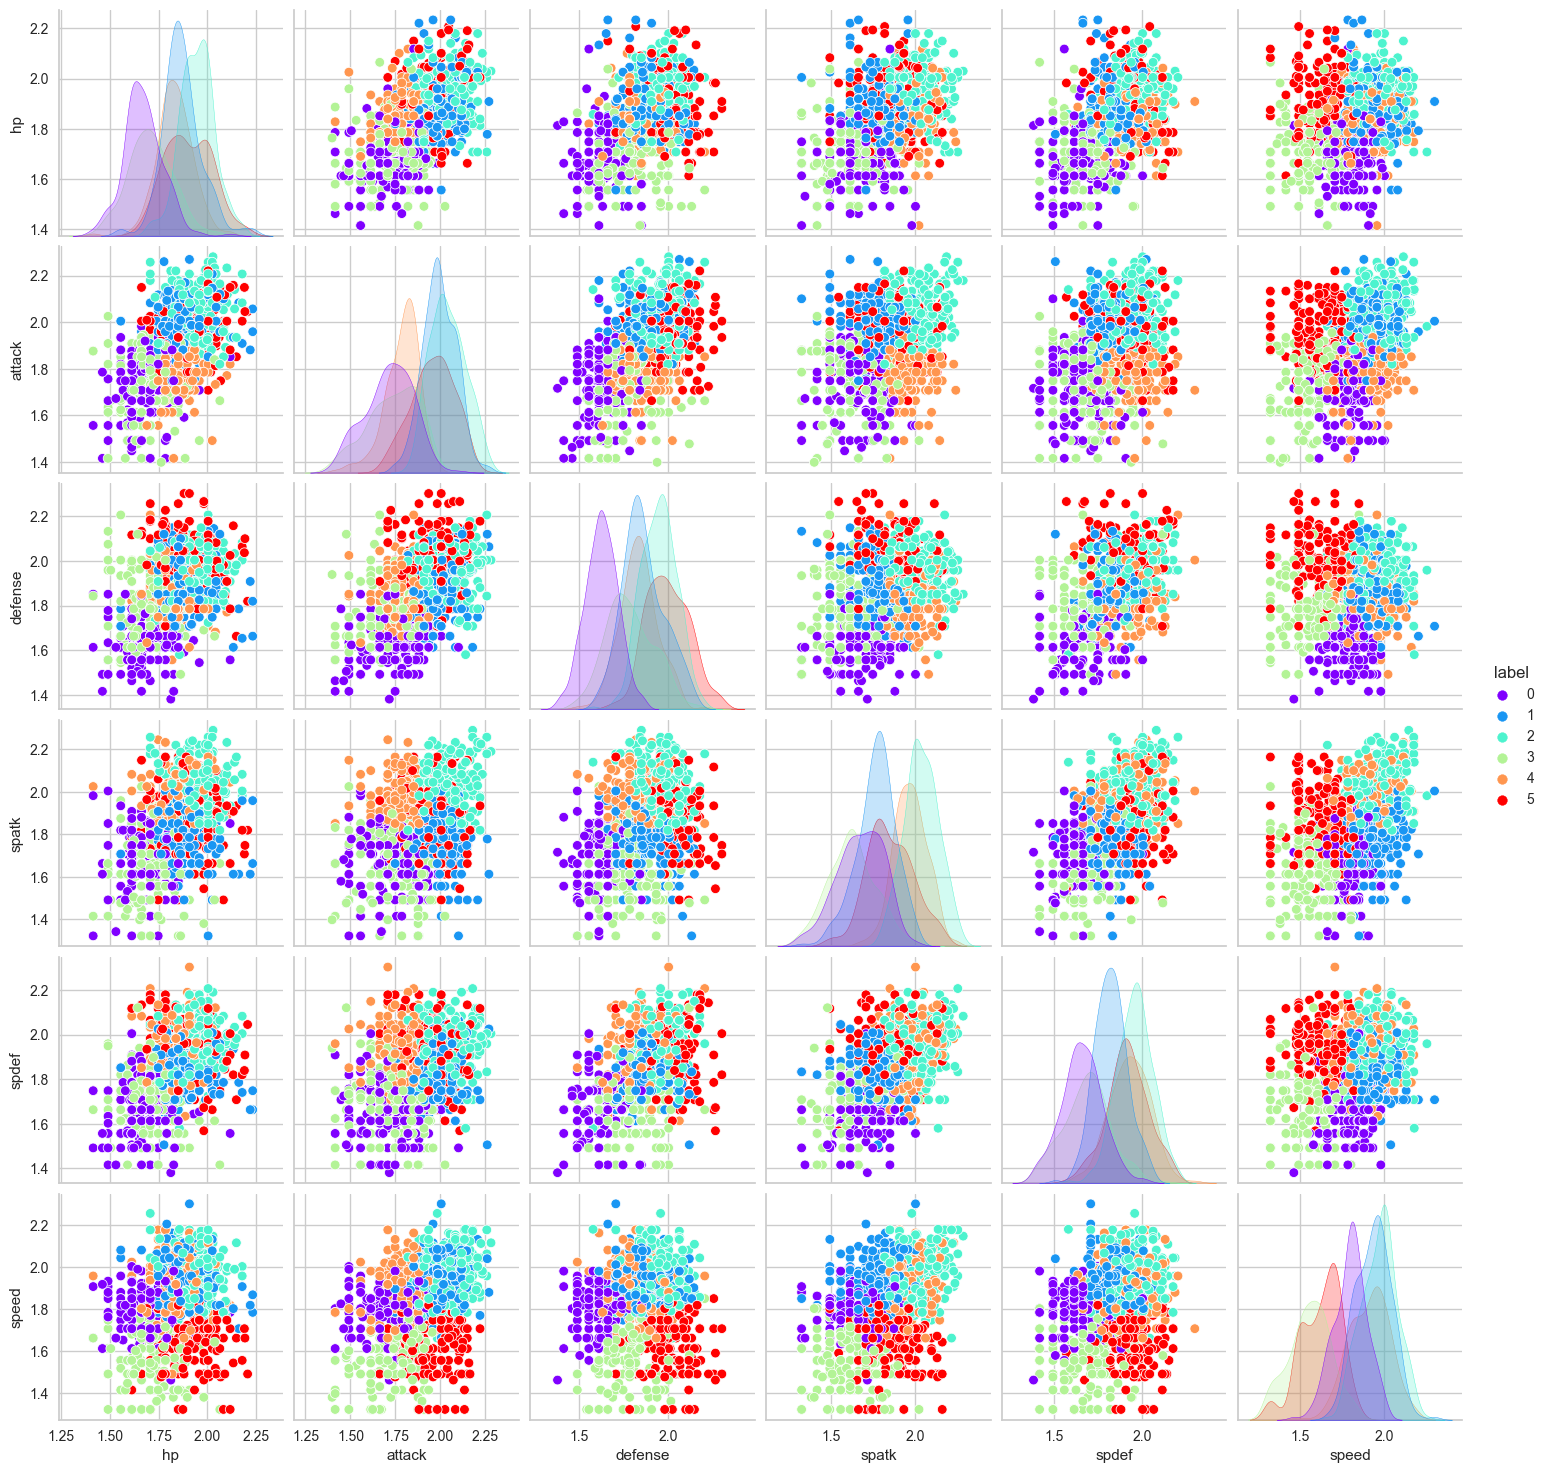

In [90]:
# # df['label'] = kmeans.labels_
sns.pairplot(df, hue='label', palette='rainbow')


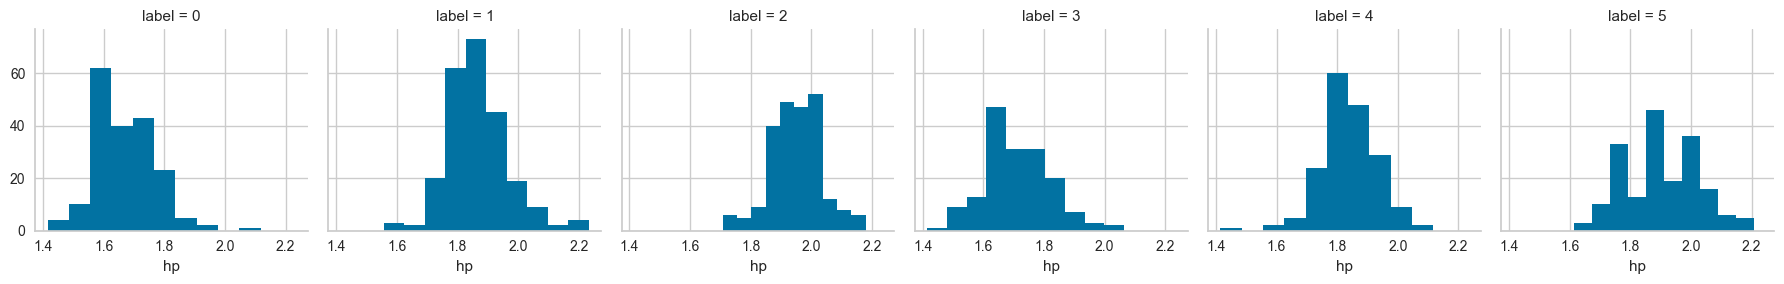

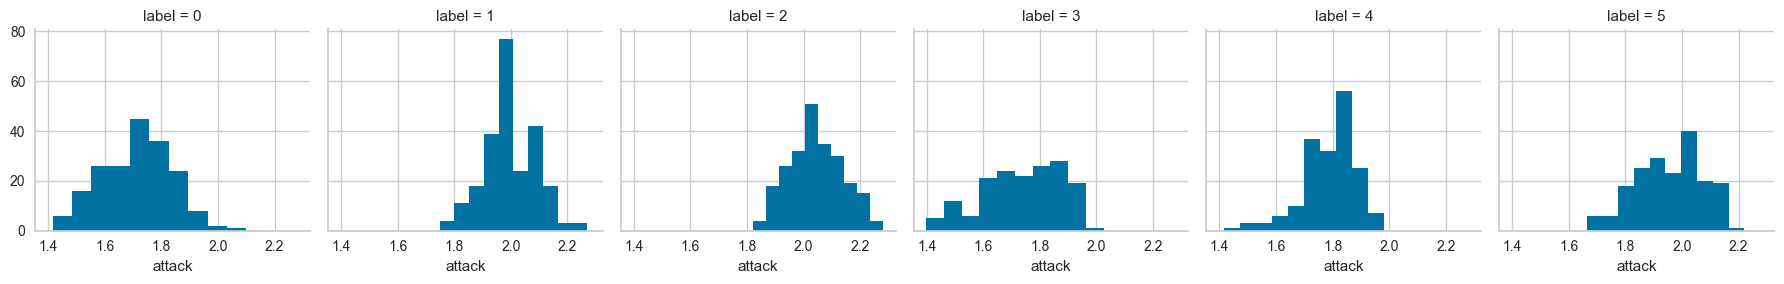

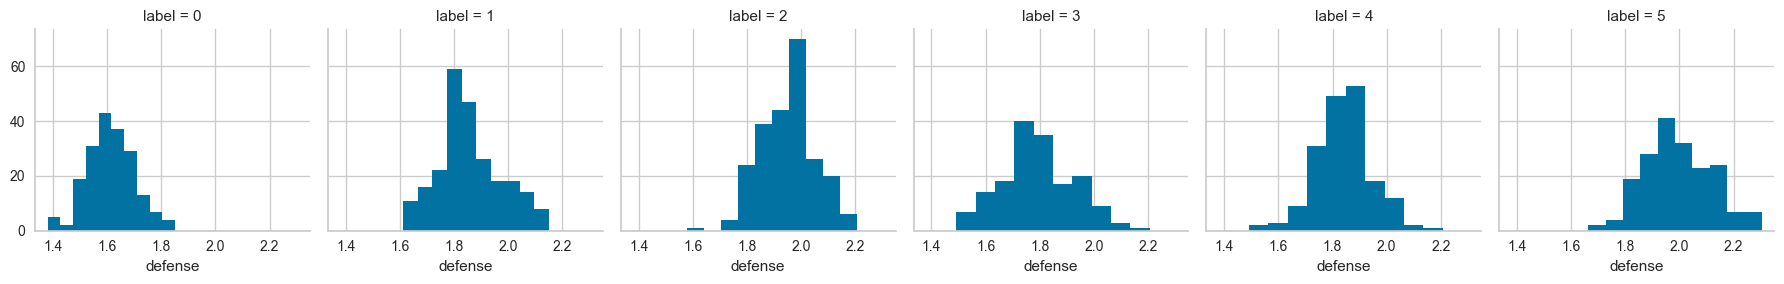

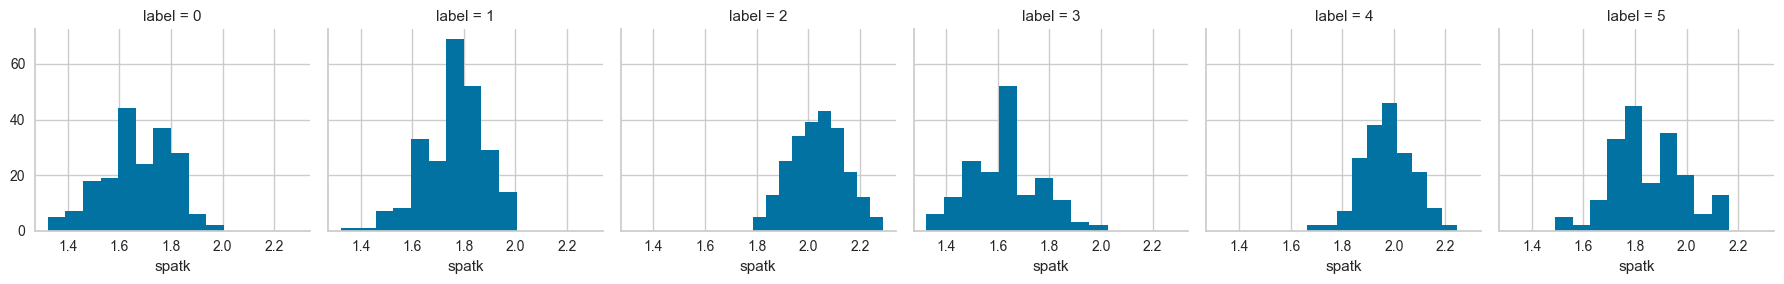

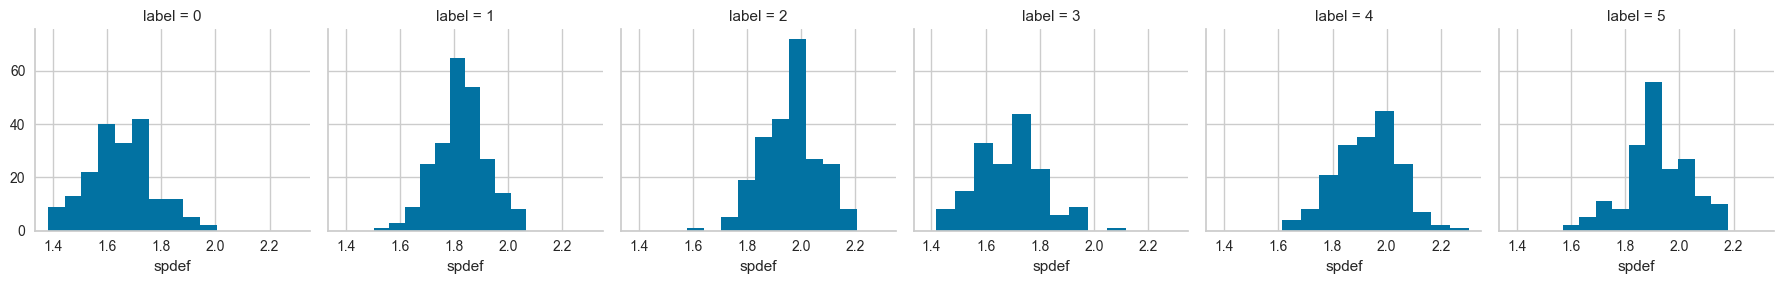

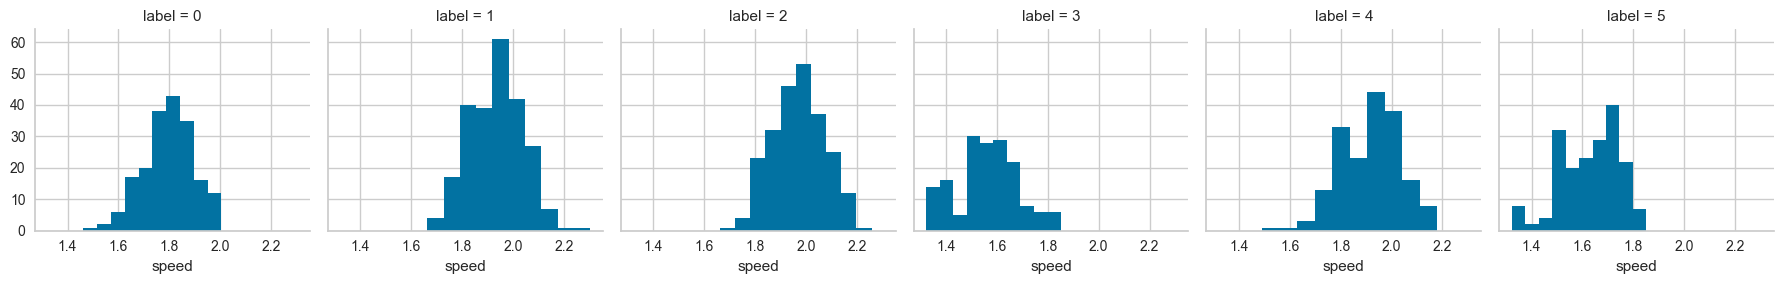

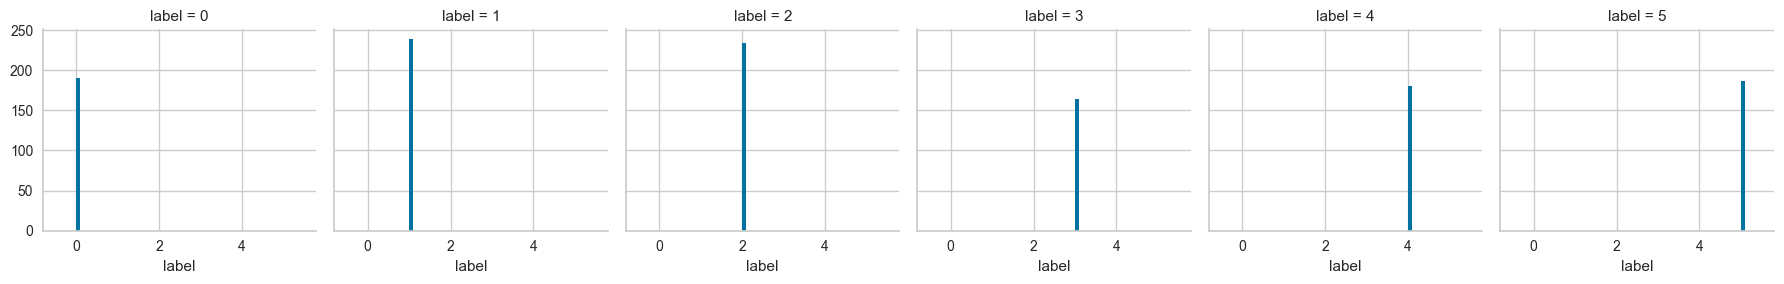

In [91]:
for col in df.columns:
    grid = sns.FacetGrid(df, col='label')
    grid.map(plt.hist, col, label='')
